In [67]:
!pip install xgboost

     --------------------------------------- 99.8/99.8 MB 11.7 MB/s eta 0:00:00


In [68]:
pip install --upgrade xgboost

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV




# INPUT DATA

In [2]:

# Đọc dữ liệu từ file CSV
file_path = 'insurance.csv'
data = pd.read_csv(file_path)
data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#Kiểm tra loại dữ liệu mỗi cột
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#Miêu tả thống kê cột
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
data['children'] = data['children'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [6]:
#Kiểm tra giá trị còn thiếu
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
# Kiểm tra tính trùng lắp
duplicates = data.duplicated()

# Hiển thị các dòng trùng lắp
duplicate_rows = data[duplicates]
print("Các dòng dữ liệu trùng lắp:")
print(duplicate_rows)

# Hiển thị tổng số dòng trùng lắp
print(f"Tổng số dòng trùng lắp: {duplicate_rows.shape[0]}")


Các dòng dữ liệu trùng lắp:
     age   sex    bmi children smoker     region    charges
581   19  male  30.59        0     no  northwest  1639.5631
Tổng số dòng trùng lắp: 1


In [5]:
#Xóa dữ liệu bị trùng lắp
data = data.drop_duplicates(keep='first')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
# Dictionary chứa thông tin về việc thay đổi tên cột theo logic
column_mapping = {
    'age': 'Age of the Insured Person',
    'sex': 'Gender',
    'bmi': 'Body Mass Index (BMI)',
    'children': 'Number of Children',
    'smoker': 'Smoking Habit',
    'region': 'Residential Region',
    'charges': 'Medical Charges'
}

# Thay đổi tên cột theo logic từ dictionary
data = data.rename(columns=column_mapping)

# Hiển thị DataFrame sau khi thay đổi tên cột
data

,Age of the Insured Person,Gender,Body Mass Index (BMI),Number of Children,Smoking Habit,Residential Region,Medical Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
# Xử lý giá trị NaN trong cột 'Smoking Habit'
data['Smoking Habit'].fillna(value='unknown', inplace=True)
# Ánh xạ 'no' thành 0 và 'yes' thành 1 cho biến 'Smoking Habit'
data['Smoking Habit'].replace({'no': 0, 'yes': 1, 'unknown': np.nan}, inplace=True)
# Thay đổi giá trị trong cột "Gender"
data['Gender'] = data['Gender'].map({'male': 0, 'female': 1})
# Ánh xạ các giá trị của 'Residential Region' thành số tương ứng
region_mapping = {'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4}
data['Residential Region'].replace(region_mapping, inplace=True)
data

,Age of the Insured Person,Gender,Body Mass Index (BMI),Number of Children,Smoking Habit,Residential Region,Medical Charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


In [9]:
# Đổi định dạng cột 'Gender' sang object
data['Gender'] = data['Gender'].astype('object')

# Đổi định dạng cột 'Smoking Habit' sang object
data['Smoking Habit'] = data['Smoking Habit'].astype('object')

# Đổi định dạng cột 'Residential Region' sang object
data['Residential Region'] = data['Residential Region'].astype('object')
data

,Age of the Insured Person,Gender,Body Mass Index (BMI),Number of Children,Smoking Habit,Residential Region,Medical Charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age of the Insured Person  1337 non-null   int64  
 1   Gender                     1337 non-null   object 
 2   Body Mass Index (BMI)      1337 non-null   float64
 3   Number of Children         1337 non-null   object 
 4   Smoking Habit              1337 non-null   object 
 5   Residential Region         1337 non-null   object 
 6   Medical Charges            1337 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 83.6+ KB


# EXPLORATORY DATA

# Summary Statistics of Numerical Columns

In [17]:
#Miêu tả thống kê cột
data.describe()

,Age of the Insured Person,Body Mass Index (BMI),Medical Charges
count,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,13279.121487
std,14.044333,6.100468,12110.359656
min,18.000000,15.960000,1121.873900
25%,27.000000,26.290000,4746.344000
50%,39.000000,30.400000,9386.161300
75%,51.000000,34.700000,16657.717450
max,64.000000,53.130000,63770.428010


In [18]:
data.select_dtypes(include=['object']).describe()

,Gender,Number of Children,Smoking Habit,Residential Region
count,1337,1337,1337,1337
unique,2,6,2,4
top,0,0,0,2
freq,675,573,1063,364


In [20]:
# Chọn các biến đối tượng cần phân tích
cat_variables = ['Gender', 'Smoking Habit', 'Residential Region']

# Thực hiện phân tích cho từng biến
for var in cat_variables:
    obs = data[var].value_counts()
    avg_claim = data.groupby(var)["Medical Charges"].mean()
    
    # Hiển thị kết quả phân tích
    display(pd.DataFrame({"Number of Policyholders": obs, "Average Claim Amount": avg_claim.map('${:,.2f}'.format)})\
            .sort_values('Number of Policyholders', ascending=False)\
            .style.set_caption("Variable: {}".format(var)))


,Number of Policyholders,Average Claim Amount
Gender,,
0,675,"$13,975.00"
1,662,"$12,569.58"


,Number of Policyholders,Average Claim Amount
Smoking Habit,,
0,1063,"$8,440.66"
1,274,"$32,050.23"


,Number of Policyholders,Average Claim Amount
Residential Region,,
2,364,"$14,735.41"
1,325,"$12,346.94"
3,324,"$12,450.84"
4,324,"$13,406.38"


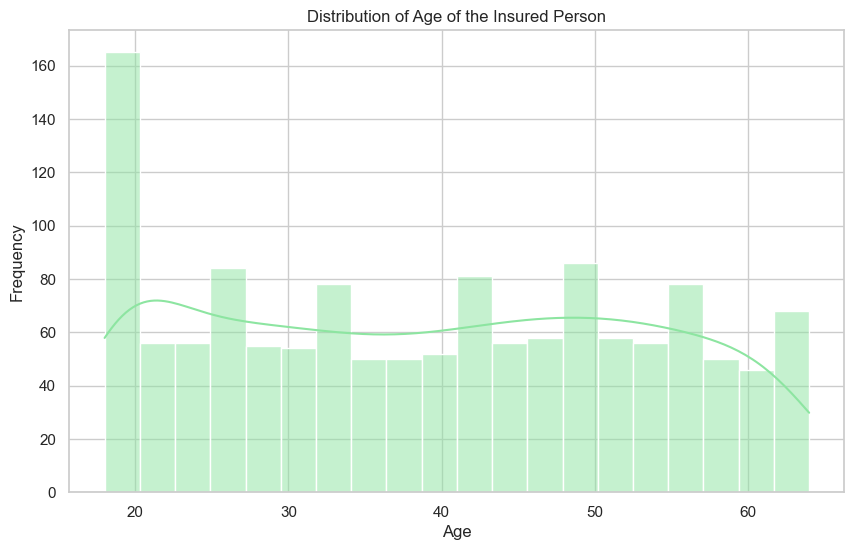

In [24]:


# Thiết lập kích thước và phong cách của biểu đồ
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Chọn mã màu từ bảng màu Seaborn
color_palette = sns.color_palette("pastel")

# Vẽ biểu đồ Histogram sử dụng Seaborn với mã màu đã chọn
sns.histplot(data['Age of the Insured Person'], bins=20, kde=True, color=color_palette[2])

# Tùy chỉnh các thông số của biểu đồ
plt.title('Distribution of Age of the Insured Person')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Hiển thị biểu đồ
plt.show()



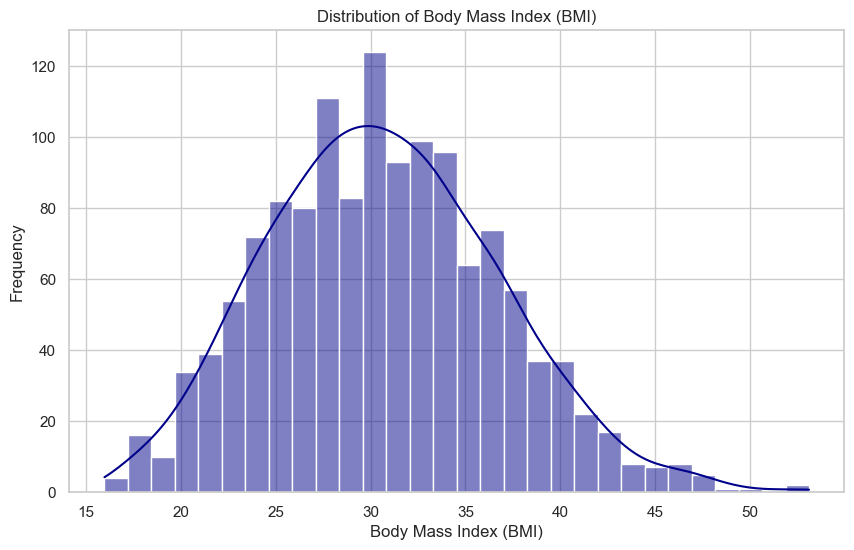

In [27]:
# Vẽ biểu đồ Histogram cho chỉ số BMI
plt.figure(figsize=(10, 6))
sns.histplot(data['Body Mass Index (BMI)'], bins=30, kde=True, color='darkblue')
plt.title('Distribution of Body Mass Index (BMI)')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Frequency')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_9932\4073076474.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




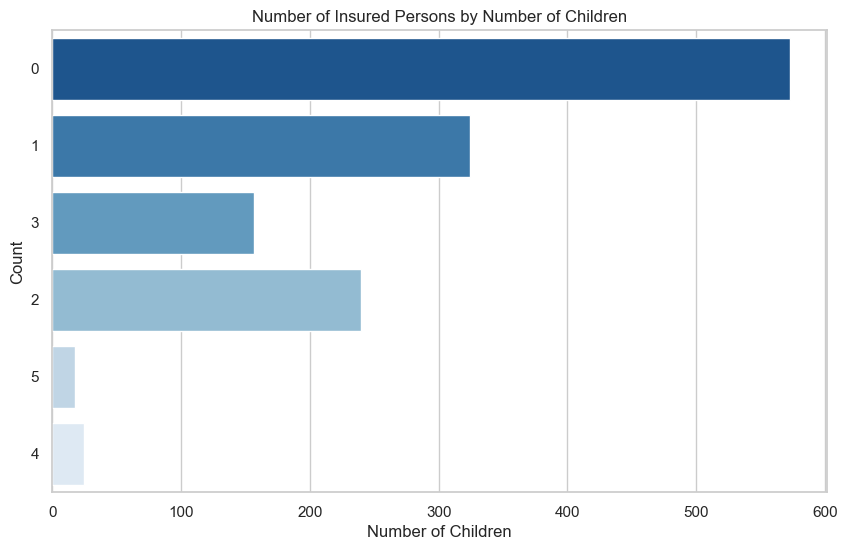

In [30]:
# Vẽ biểu đồ Bar Chart cho số lượng người được bảo hiểm theo số lượng trẻ em
plt.figure(figsize=(10, 6))
sns.countplot(data['Number of Children'], palette='Blues_r')
plt.title('Number of Insured Persons by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

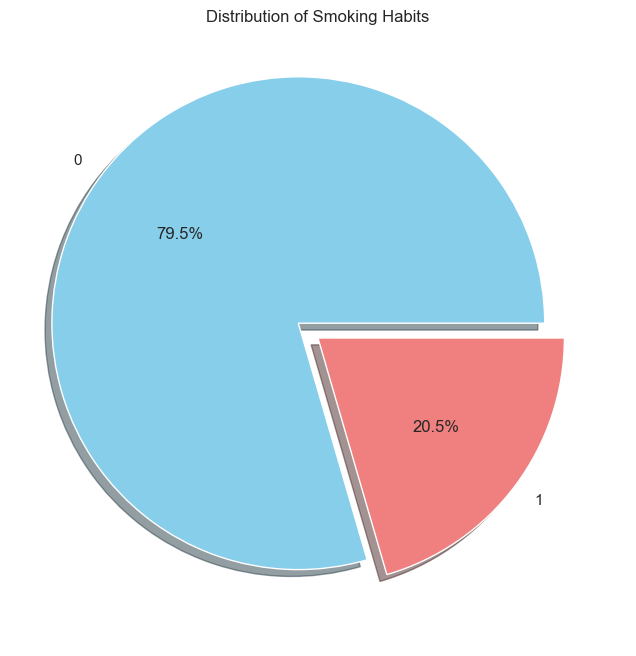

In [32]:
# Chuẩn bị dữ liệu explode để làm nổi bật một phần của biểu đồ
explode = (0.1, 0)

# Vẽ biểu đồ Pie Chart với hiệu ứng explode
plt.figure(figsize=(8, 8))
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], explode=explode, shadow=True)
plt.title('Distribution of Smoking Habits')
plt.show()

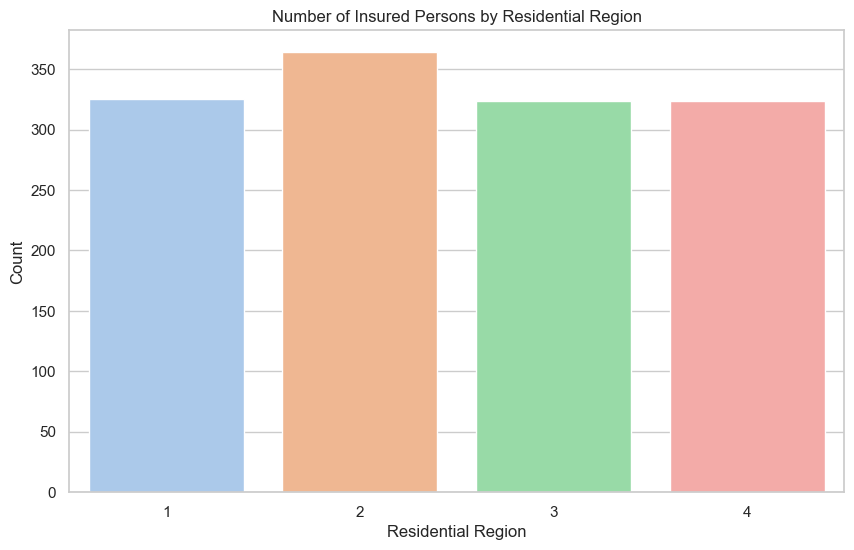

In [43]:
# Vẽ biểu đồ Bar Chart với màu gradient và làm đậm cột màu nhất
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Residential Region', palette='pastel', hue='Residential Region', dodge=False, legend=False)

# Lấy bảng màu từ biểu đồ
palette = sns.color_palette('pastel', n_colors=len(data['Residential Region']))

# Sửa màu của cột cuối cùng để làm đậm
palette[-1] = (0, 0, 1, 1)

plt.title('Number of Insured Persons by Residential Region')
plt.xlabel('Residential Region')
plt.ylabel('Count')
plt.show()

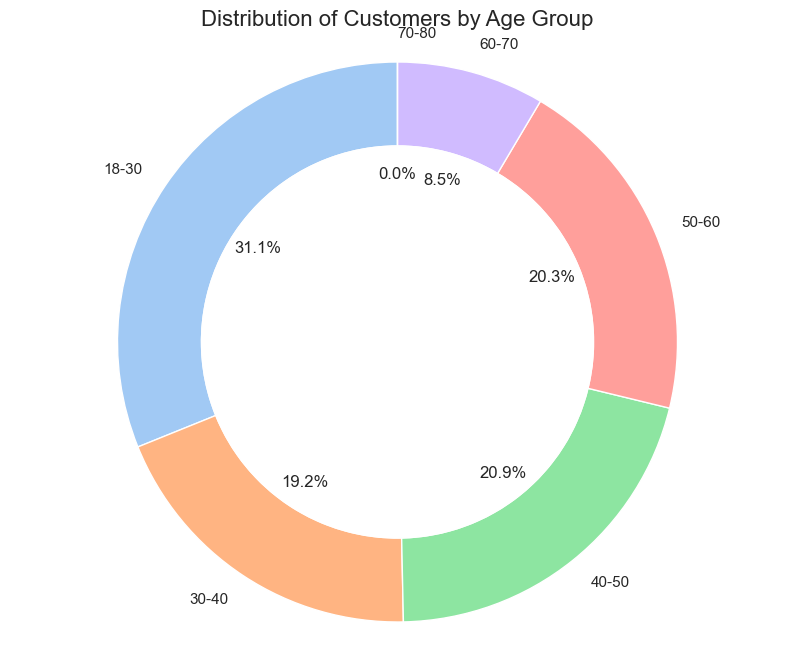

In [46]:
# Tính toán số lượng trong mỗi nhóm tuổi
age_groups = pd.cut(data['Age of the Insured Person'], bins=[18, 30, 40, 50, 60, 70, 80], right=False)
age_group_counts = age_groups.value_counts(sort=False)

# Vẽ biểu đồ Pie Chart với Seaborn
plt.figure(figsize=(10, 8))
sns.set_palette('pastel')
sns.set_style('whitegrid')

# Vẽ Pie Chart
plt.pie(age_group_counts, labels=[f'{interval.left}-{interval.right}' for interval in age_group_counts.index], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3, edgecolor='w'))

# Tạo hình tròn ở giữa để làm cho biểu đồ trông đẹp hơn
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Customers by Age Group', fontsize=16)
plt.axis('equal')  # Đảm bảo biểu đồ có hình dạng tròn
plt.show()

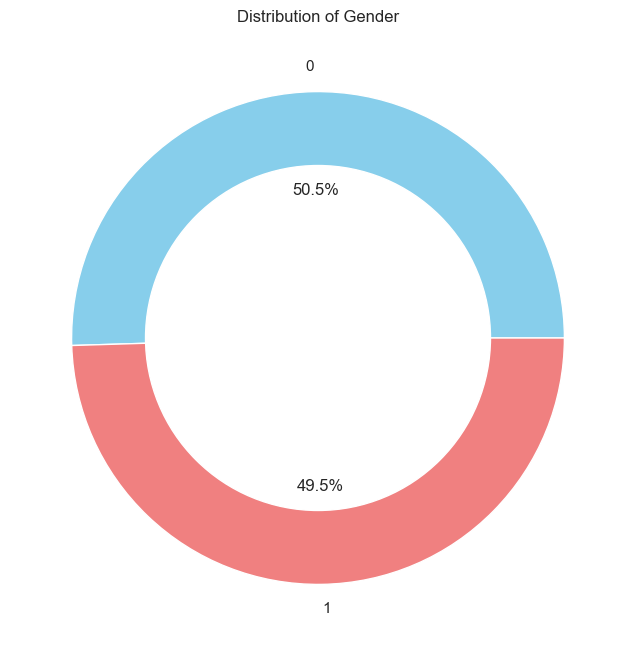

In [45]:
# Tính toán số lượng nam và nữ
gender_counts = data['Gender'].value_counts()

# Thiết lập màu sắc cho biểu đồ
colors = ['skyblue', 'lightcoral']

# Vẽ biểu đồ Pie Chart với Seaborn
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.4, edgecolor='w'))

# Tạo hình tròn ở giữa để làm cho biểu đồ trông đẹp hơn
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Gender')

plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9932\1630400054.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




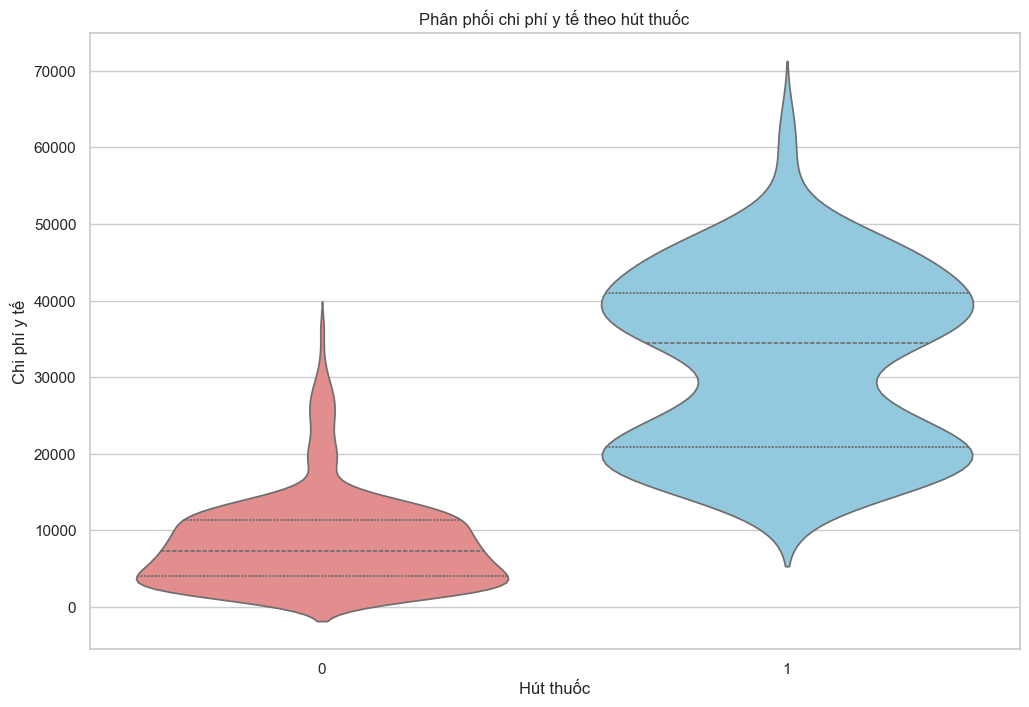

In [49]:
# Vẽ biểu đồ Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Smoking Habit', y='Medical Charges', data=data, palette=['lightcoral', 'skyblue'], inner='quartile')
plt.title('Phân phối chi phí y tế theo hút thuốc')
plt.xlabel('Hút thuốc')
plt.ylabel('Chi phí y tế')
plt.show()

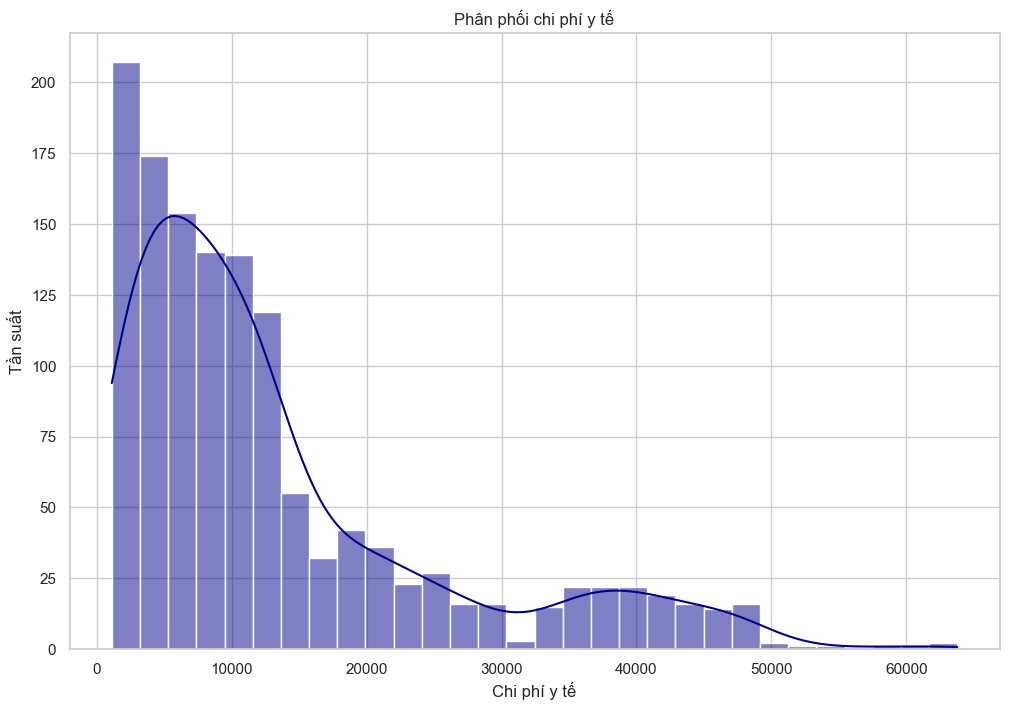

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử data là DataFrame đã được thay đổi tên cột theo logic
# Nếu chưa thay đổi, hãy sử dụng data.rename(columns=column_mapping) trước khi vẽ biểu đồ.

# Vẽ biểu đồ Histogram cho cột 'charges'
plt.figure(figsize=(12, 8))
sns.histplot(data['Medical Charges'], bins=30, kde=True, color='darkblue')
plt.title('Phân phối chi phí y tế')
plt.xlabel('Chi phí y tế')
plt.ylabel('Tần suất')
plt.show()


<Figure size 1000x800 with 0 Axes>

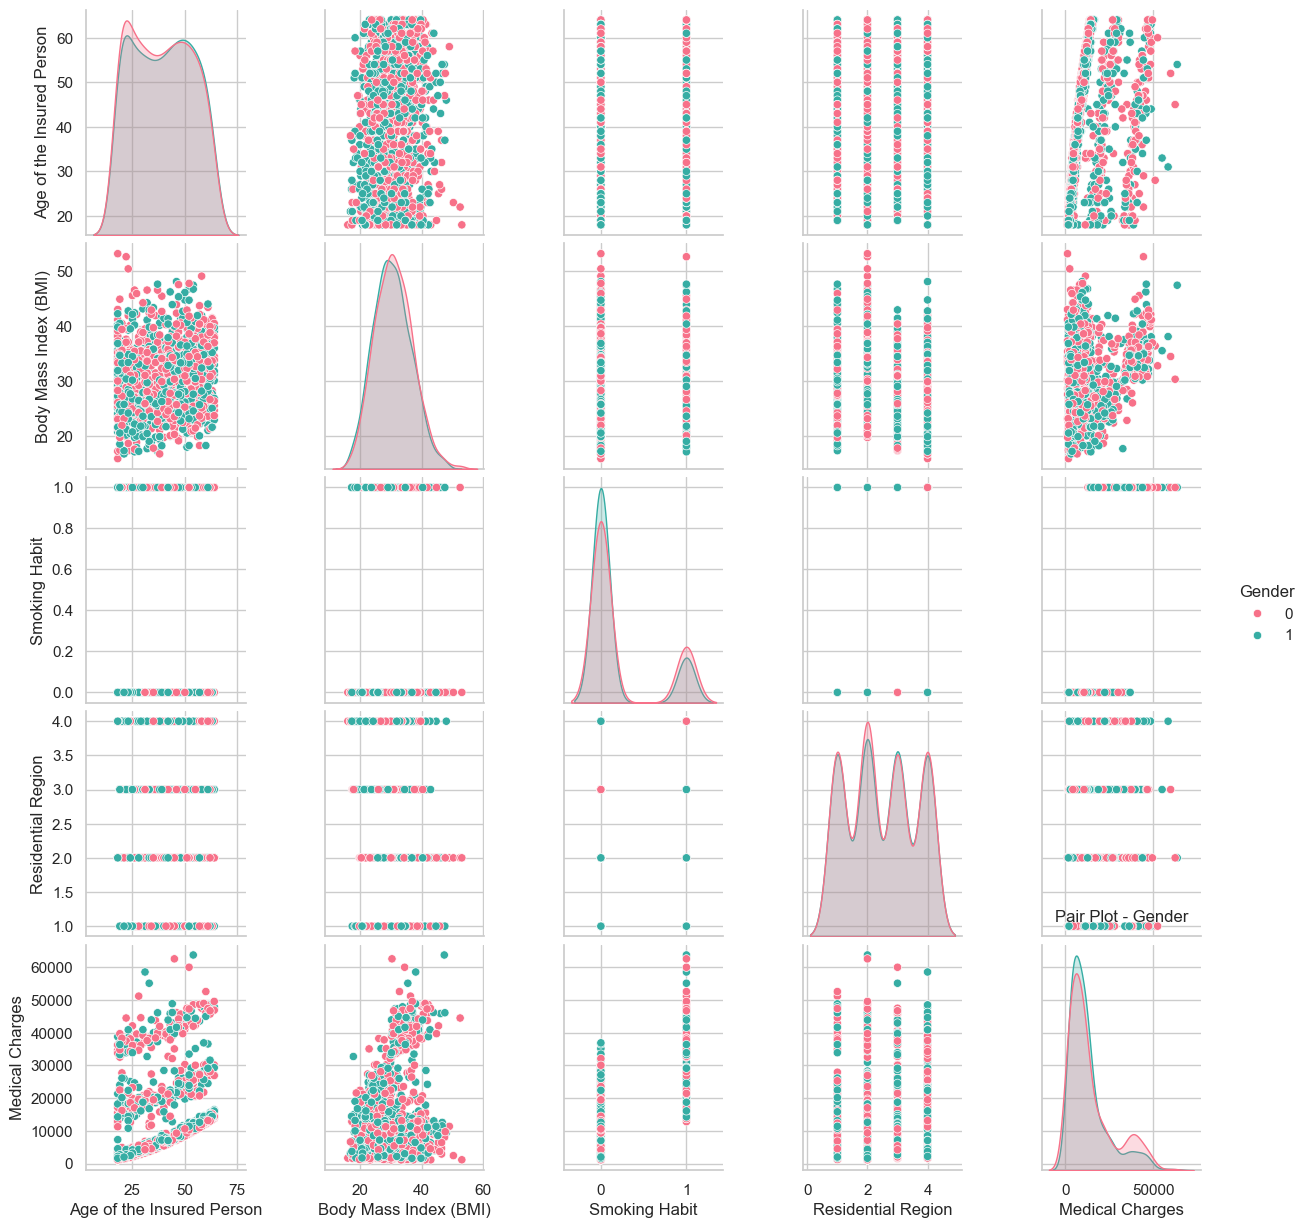

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: 
The palette list has

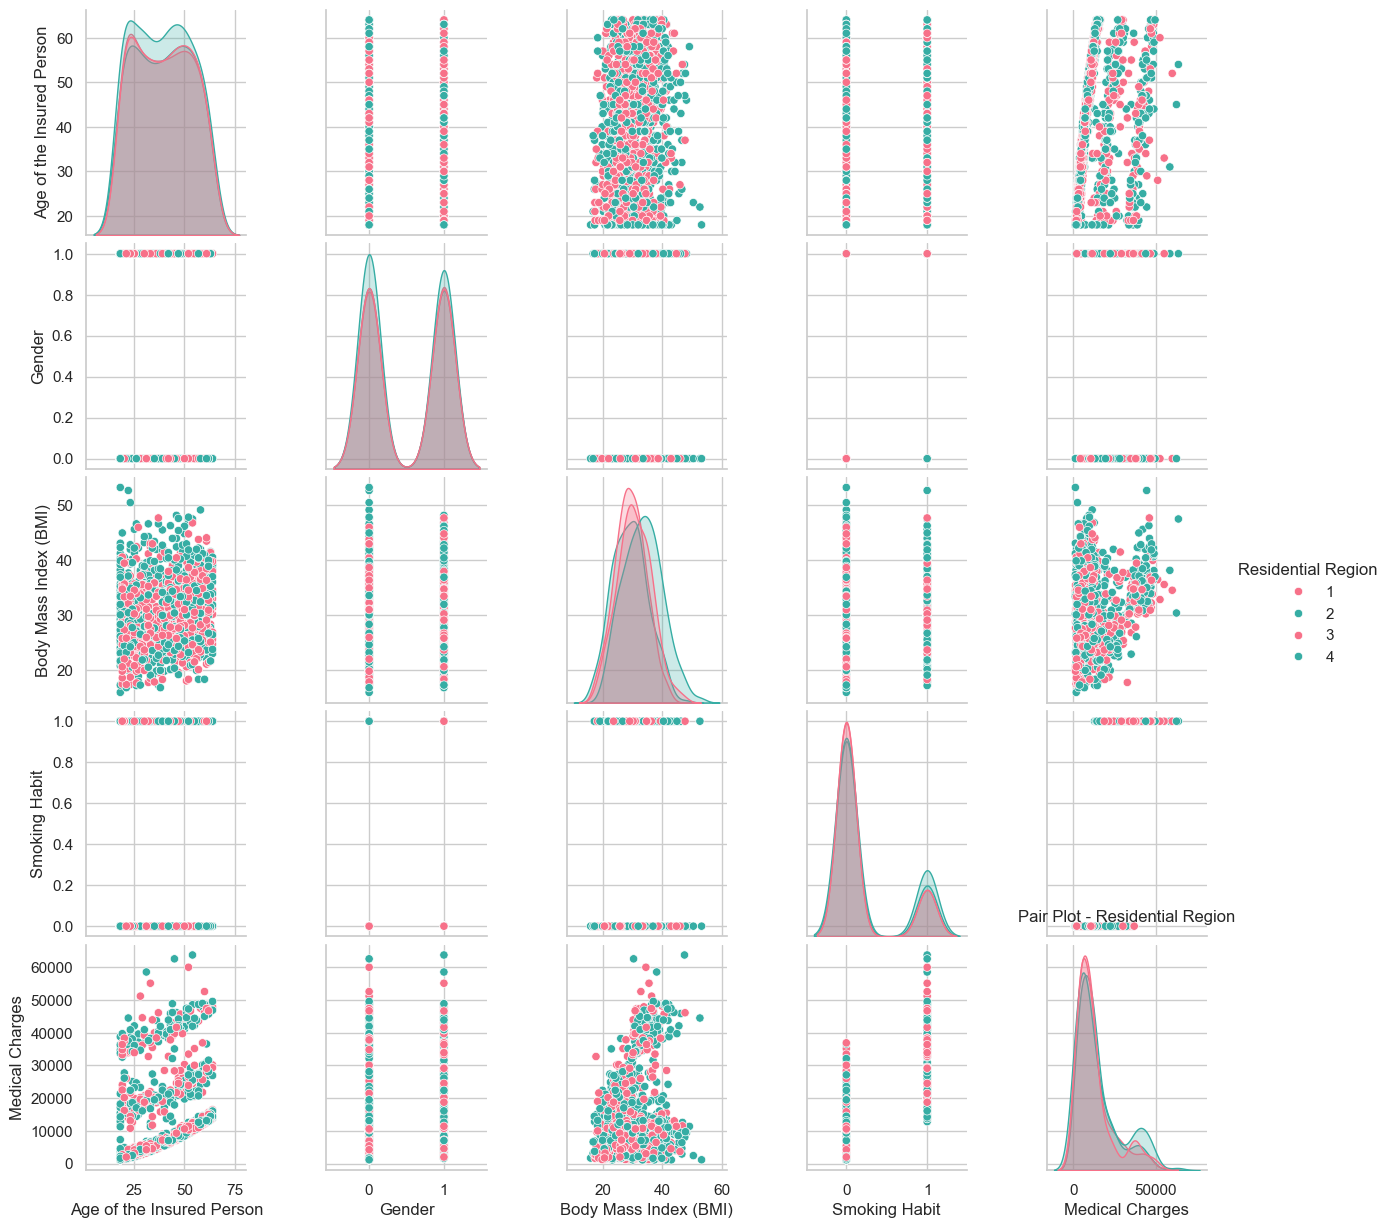

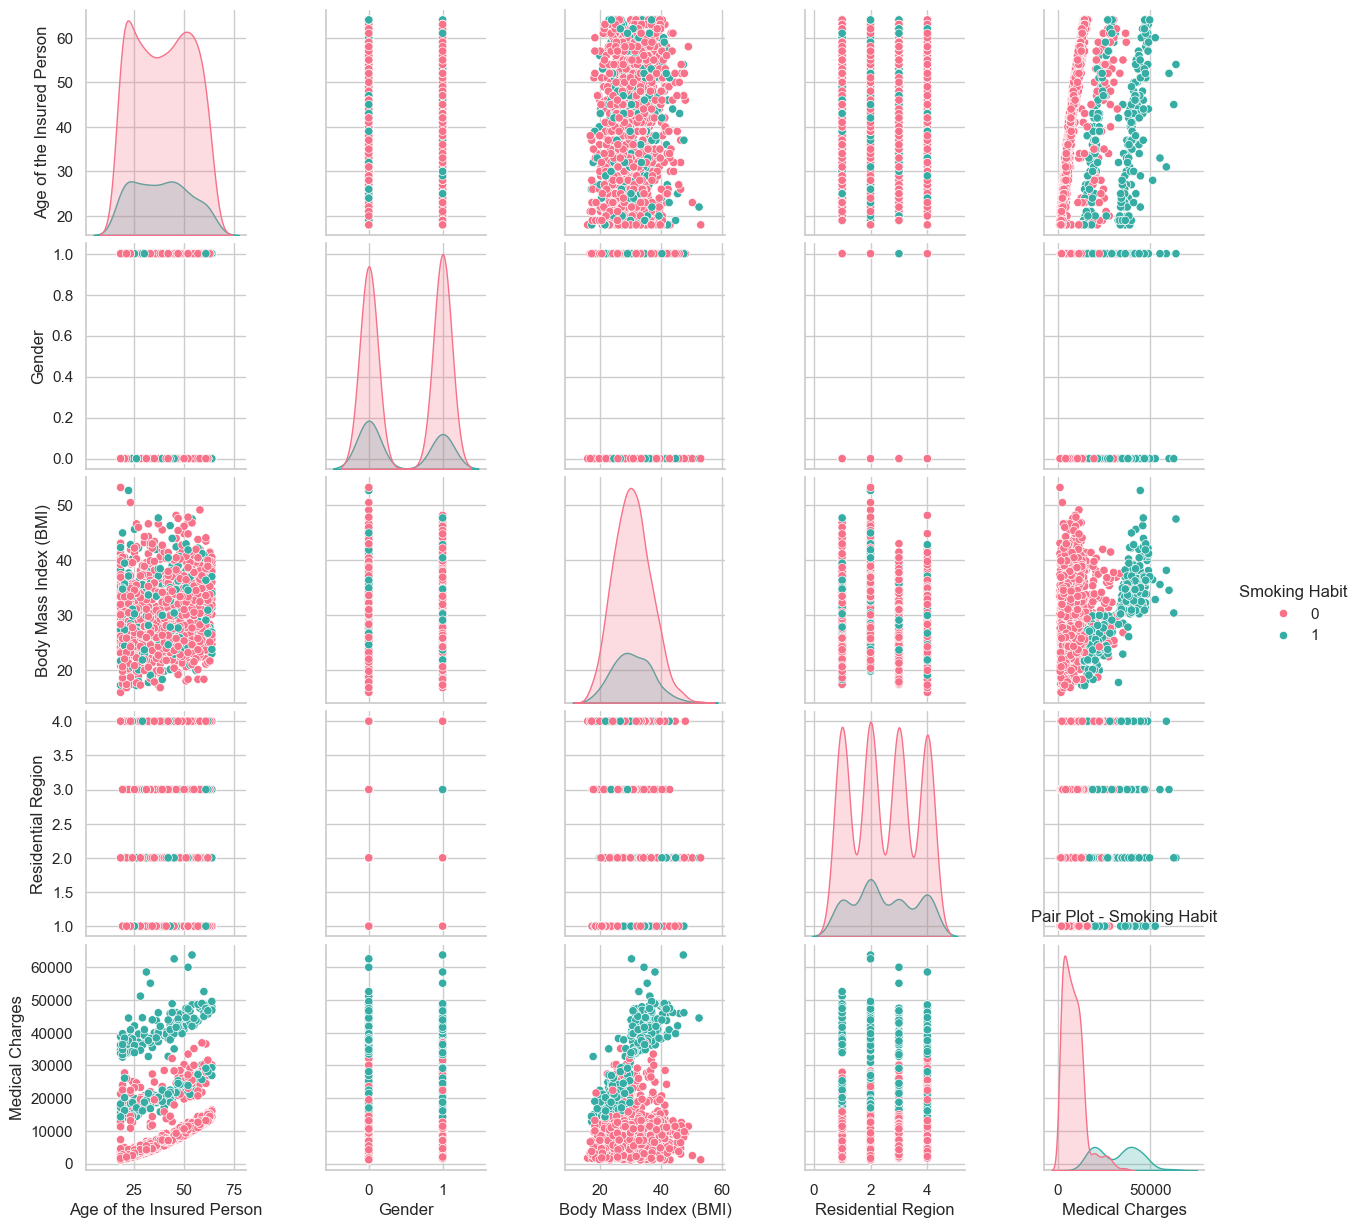

In [29]:
# Thiết lập màu sắc và giao diện đồ thị
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Bảng màu tùy chỉnh
custom_palette = sns.color_palette("husl", n_colors=len(data['Gender'].unique()))

# Lặp qua các giá trị của biến 'category' (Gender, Residential Region, Smoking Habit)
for i, category in enumerate(['Gender', 'Residential Region', 'Smoking Habit'], 1):
    # Vẽ pairplot với tô màu theo biến 'category' và bảng màu tùy chỉnh
    sns.pairplot(data, hue=category, palette=custom_palette, diag_kind='kde')
    plt.title(f'Pair Plot - {category}')

    # Tăng khoảng cách giữa các biểu đồ
    plt.subplots_adjust(wspace=0.5)

    # Hiển thị biểu đồ
    plt.show()

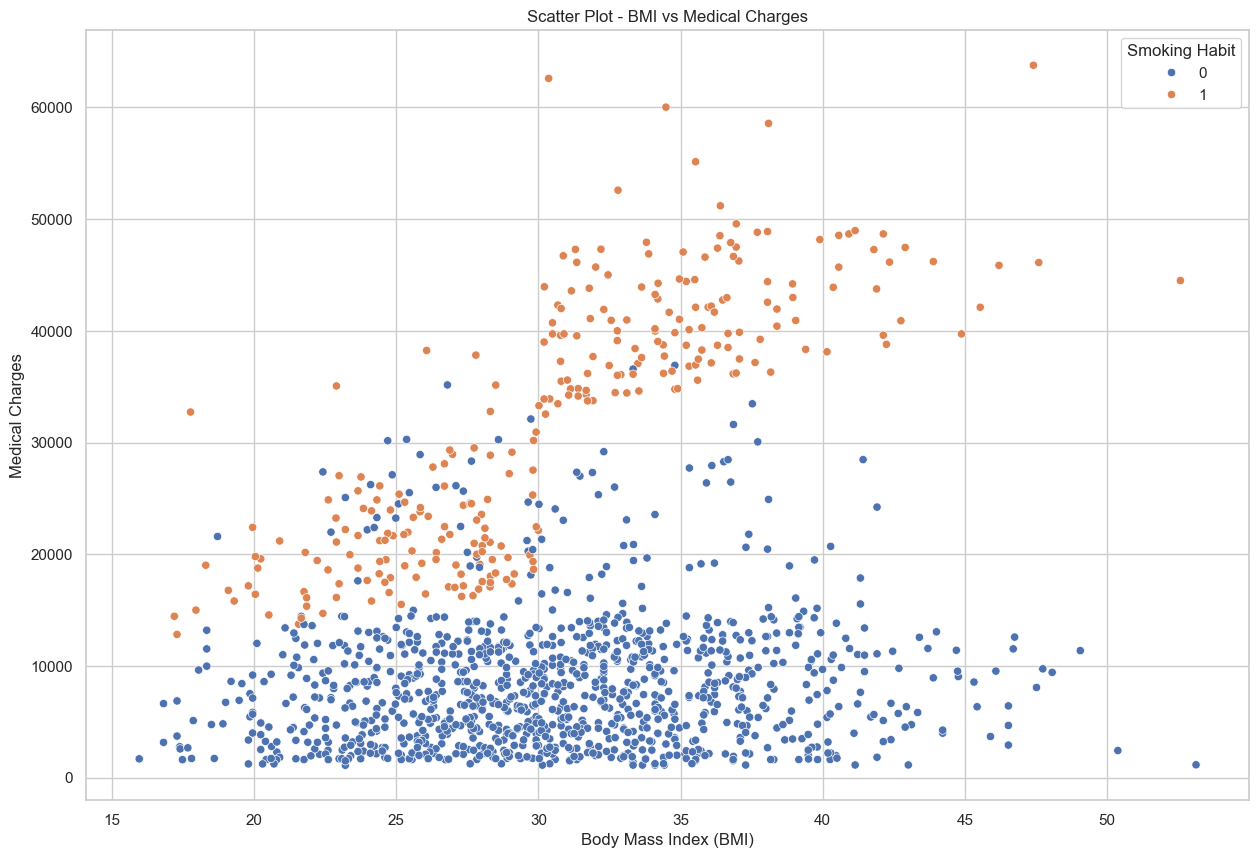

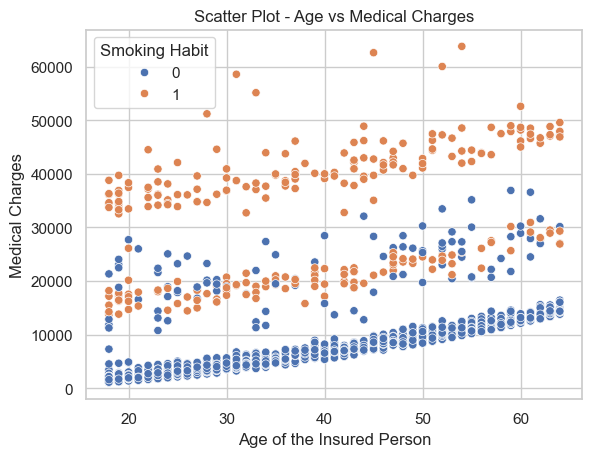

In [30]:
# Thiết lập màu sắc và giao diện đồ thị
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Scatter plot cho cột 'bmi' và 'charges' với tên cột đã được thay đổi và tô màu theo 'smoker'
sns.scatterplot(data=data, x="Body Mass Index (BMI)", y="Medical Charges", hue='Smoking Habit')
plt.title('Scatter Plot - BMI vs Medical Charges')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Medical Charges')
plt.show()

# Scatter plot cho cột 'age' và 'charges' với tên cột đã được thay đổi và tô màu theo 'smoker'
sns.scatterplot(data=data, x="Age of the Insured Person", y="Medical Charges", hue='Smoking Habit')
plt.title('Scatter Plot - Age vs Medical Charges')
plt.xlabel('Age of the Insured Person')
plt.ylabel('Medical Charges')
plt.show()

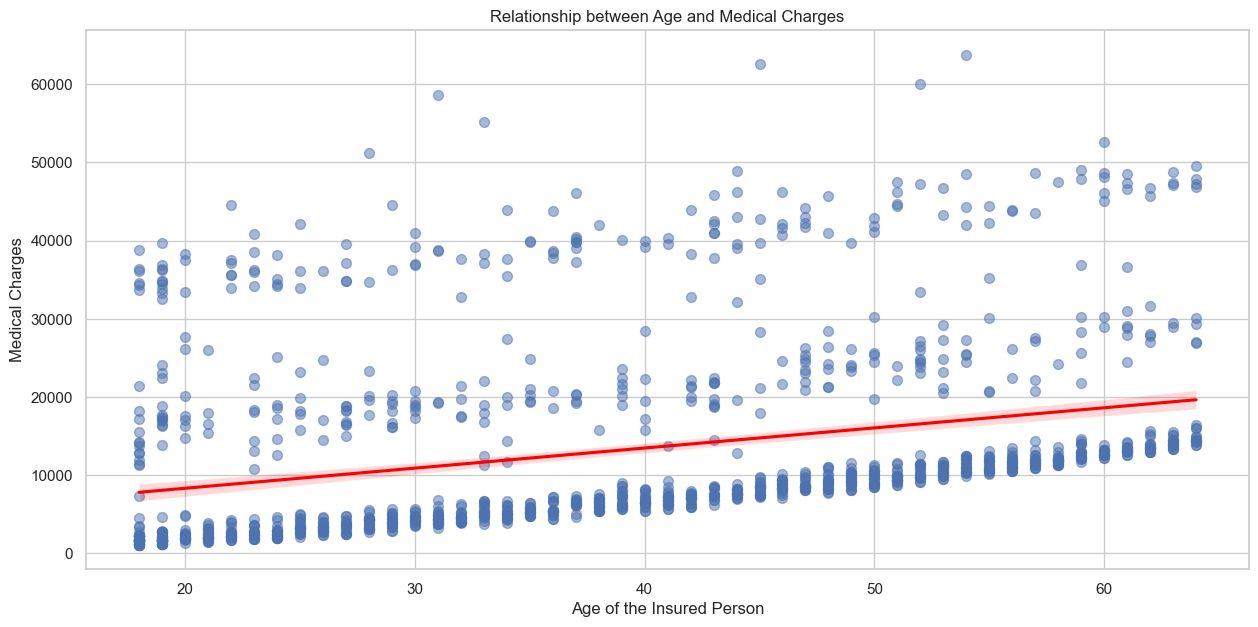

In [36]:

# Vẽ biểu đồ regression plot với tên cột đã thay đổi và một số tùy chỉnh
plt.figure(figsize=(15, 7))
sns.regplot(x=data['Age of the Insured Person'], y=data['Medical Charges'], scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Age of the Insured Person')
plt.ylabel('Medical Charges')
plt.title('Relationship between Age and Medical Charges')
plt.show()


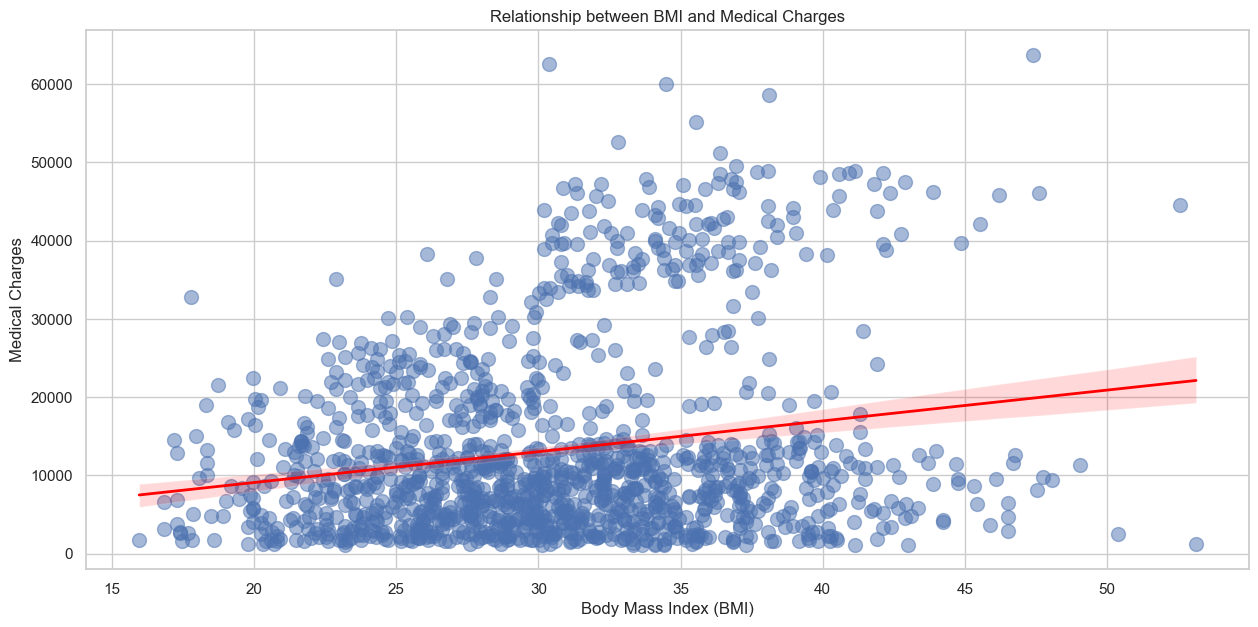

In [38]:
# Vẽ biểu đồ regression plot với tên cột đã thay đổi và thiết lập thêm yếu tố
plt.figure(figsize=(15, 7))
sns.regplot(x=data['Body Mass Index (BMI)'], y=data['Medical Charges'], scatter_kws={'alpha':0.5, 's':100}, line_kws={'color':'red', 'linewidth':2})
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Medical Charges')
plt.title('Relationship between BMI and Medical Charges')
plt.show()


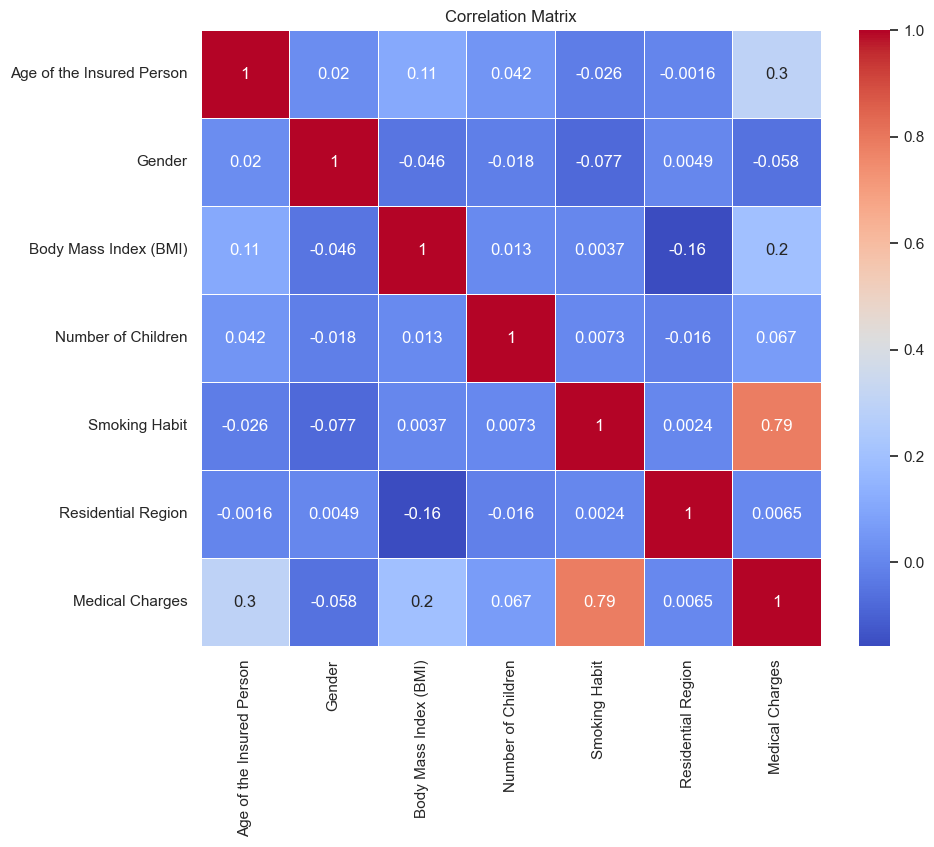

In [43]:
# Tính toán ma trận tương quan
correlation_matrix = data.corr()

# Thiết lập màu sắc và giao diện đồ thị
sns.set(style="white")

# Tạo biểu đồ heatmap với bảng màu gradient 'coolwarm'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Hiển thị đồ thị
plt.title('Correlation Matrix')
plt.show()

In [47]:
# Select columns for independent features
X = data[['Age of the Insured Person', 'Gender', 'Body Mass Index (BMI)', 'Number of Children', 'Smoking Habit', 'Residential Region']]

# Select the dependent feature
y = data['Medical Charges']
X

,Age of the Insured Person,Gender,Body Mass Index (BMI),Number of Children,Smoking Habit,Residential Region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,4
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,1


In [48]:
scores=[]
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [50]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size = 0.8, test_size=0.2, random_state=0)

In [52]:

from sklearn.linear_model import LinearRegression

model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
pred_lr=model_lr.predict(X_test)

In [53]:
scores.append({
        'model': 'Linear Regression',
        'r2_score': r2_score(y_test, pred_lr)*100,
    'MS_score' : mean_squared_error(y_test,pred_lr)
    })

pred=pred_lr

print('Testing R2 Score: ', r2_score(y_test, pred_lr)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,pred_lr))

Testing R2 Score:  75.26726290709554 
Testing mean squared:  41607776.51148494


In [55]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=4, min_samples_split=20,random_state=0)

In [56]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_split=20, random_state=0)

In [57]:
y_preds = dt_model.predict(X_test)

In [58]:
scores.append({
        'model': 'DecisionTreeRegressor',
        'r2_score': r2_score(y_test, y_preds )*100,
    'MS_score' : mean_squared_error(y_test,y_preds)
    })

pred=y_preds

print('Testing R2 Score: ', r2_score(y_test, y_preds)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,y_preds))

Testing R2 Score:  83.9385105173896 
Testing mean squared:  27020174.205698475


In [59]:
from sklearn.ensemble import RandomForestRegressor
rf_model= RandomForestRegressor(random_state=1)

In [60]:
rf_model.fit(X_train,y_train)
rf=rf_model.predict(X_test)

In [61]:
scores.append({
        'model': 'RandomForestRegressor',
        'r2_score': r2_score(y_test, rf )*100,
    'MS_score' : mean_squared_error(y_test,rf)
    })

pred=rf

print('Testing R2 Score: ', r2_score(y_test, rf)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,rf))

Testing R2 Score:  83.87159223931066 
Testing mean squared:  27132750.5351352


In [62]:
from sklearn.neighbors import KNeighborsRegressor

In [63]:
knn_model = KNeighborsRegressor(n_neighbors=6)
knn_model.fit(X_train, y_train)
knn= knn_model.predict(X_test)

In [64]:
scores.append({
        'model': 'KNeighborsRegressor',
        'r2_score': r2_score(y_test, knn )*100,
    'MS_score' : mean_squared_error(y_test,knn)
    })

pred=knn

print('Testing R2 Score: ', r2_score(y_test, knn)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,knn))

Testing R2 Score:  17.8907590011531 
Testing mean squared:  138132020.57558766


In [65]:

from sklearn.ensemble import GradientBoostingRegressor
gb_model= GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=1)

In [66]:
gb_model.fit(X_train, y_train)
gb= gb_model.predict(X_test)
scores.append({
        'model': 'GradientBoostingRegressor',
        'r2_score': r2_score(y_test, gb )*100,
    'MS_score' : mean_squared_error(y_test,gb)
    })

pred=gb

print('Testing R2 Score: ', r2_score(y_test, gb)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,gb))

Testing R2 Score:  75.16095255725048 
Testing mean squared:  41786621.952674724


In [73]:
Score = pd.DataFrame(scores,columns=['model','r2_score','MS_score'])
Score.sort_values('r2_score',ascending=False,inplace=True)
Score

,model,r2_score,MS_score
1,DecisionTreeRegressor,83.938511,2.702017e+07
2,RandomForestRegressor,83.871592,2.713275e+07
0,Linear Regression,75.267263,4.160778e+07
4,GradientBoostingRegressor,75.160953,4.178662e+07
3,KNeighborsRegressor,17.890759,1.381320e+08
